# Script: The Demonstration of the Model Region

From the online bathymetry data of SalishSeaCast, we will be able to extract the mesh code of the region of our numerical model, which could be used in both the Methods part and the part where we need to integrate the upper layer biomass. 

In [ ]:
# Bathy file inspection

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# 1. 获取数据

ds = nc.Dataset(
    "/data/nsoontie/MEOPAR/NEMO-forcing/grid/" "bathy_meter_SalishSea2.nc"
)

# print(ds)

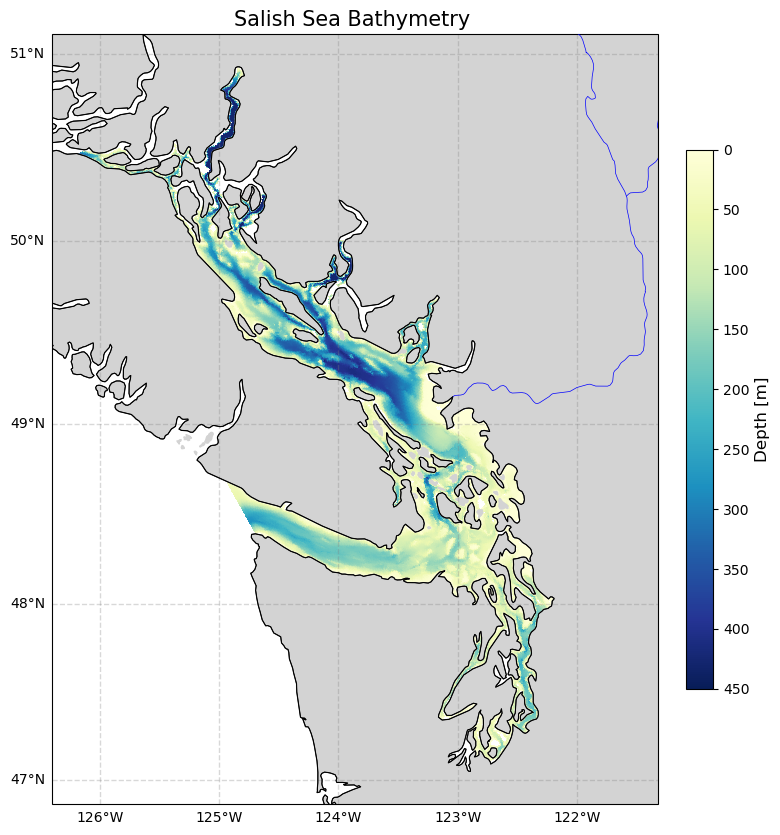

In [16]:
# Bathy plot

import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# 1. 使用 netCDF4 打开本地文件
file_path = "/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc"
with nc.Dataset(file_path, 'r') as ds:
    # 提取变量
    lons = ds.variables['nav_lon'][:]
    lats = ds.variables['nav_lat'][:]
    bathy = ds.variables['Bathymetry'][:]

# 2. 创建画布与投影
fig = plt.figure(figsize=(12, 10))
# 使用 Mercator 投影在局部海域图上通常看起来更“正”一些
# 如果习惯等距圆柱投影，可以换回 ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Mercator())

# 4. 绘制深度图
pcm = ax.pcolormesh(lons, lats, bathy, 
                    transform=ccrs.PlateCarree(),
                    cmap='YlGnBu', 
                    shading='auto',
                    vmin=0, vmax=450)

# 5. 添加并反转 colorbar
cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', pad=0.03, shrink=0.7)
cbar.set_label('Depth [m]', fontsize=12)

# 将 colorbar 的 Y 轴反转
# 这样 0 (浅水) 就会在顶部，450 (深水) 就会在底部
cbar.ax.invert_yaxis()

# 4. 叠加地图特征
# 增加 LAND 填充以覆盖陆地区域的格点
# ax.add_feature(cfeature.LAND, facecolor='#e0e0e0', zorder=2)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, zorder=3)
ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor='blue', zorder=3)

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor='lightgray')

ax.add_feature(land_10m, zorder=2)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5, zorder=3)

# 5. 设置坐标和网格线
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# 6. 图例与标题
#cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', pad=0.03, shrink=0.7)
#cbar.set_label('Depth [m]', fontsize=12)
plt.title('Salish Sea Bathymetry ', fontsize=15)

# 设置显示范围 (根据 Salish Sea 范围自动或手动微调)
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

plt.show()

In [ ]:
# Save as .svg
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取数据 (保持不变)
file_path = "/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc"
with nc.Dataset(file_path, 'r') as ds:
    lons = ds.variables['nav_lon'][:]
    lats = ds.variables['nav_lat'][:]
    bathy = ds.variables['Bathymetry'][:]

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 1. 使用 rasterized=True 解决矢量渲染压力
# 2. 陆地填充 zorder 设高，并确保不是透明的
pcm = ax.pcolormesh(lons, lats, bathy, 
                    transform=ccrs.PlateCarree(),
                    cmap='YlGnBu_r', 
                    vmin=0, vmax=450,
                    rasterized=True) 

ax.add_feature(cfeature.LAND, facecolor='#d3d3d3', edgecolor='none', zorder=2)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=3)

# 5. 设置坐标和网格线
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Colorbar 处理
cbar = plt.colorbar(pcm, ax=ax, pad=0.03, shrink=0.7)
cbar.ax.invert_yaxis()

cbar.set_label('Depth [m]', fontsize=12)



# 强制设置显示范围，防止坐标漂移到空白区域
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])

# 保存文件，确保使用 dpi300 让 rasterized 的部分也清晰
plt.savefig("SalishSea_Bathy.svg", format='svg', bbox_inches='tight', dpi=300)
plt.close() # 释放内存